# Projeto de Análise de Dados e Modelos de Aprendizado de Máquina

## Pré-processamento de Dados

   Gender Symptoms Alcohol HBsAg HBeAg HBcAb HCVAb Cirrhosis Endemic Smoking  \
0    Male       No     Yes    No    No    No    No       Yes      No     Yes   
1  Female        ?      No    No    No    No   Yes       Yes       ?       ?   
2    Male       No     Yes   Yes    No   Yes    No       Yes      No     Yes   
3    Male      Yes     Yes    No    No    No    No       Yes      No     Yes   
4    Male      Yes     Yes   Yes    No   Yes    No       Yes      No     Yes   

   ...  ALP   TP Creatinine Nodules Major_Dim Dir_Bil Iron Sat Ferritin  Class  
0  ...  150  7.1        0.7       1       3.5     0.5    ?   ?        ?  Lives  
1  ...    ?    ?          ?       1       1.8       ?    ?   ?        ?  Lives  
2  ...  109    7        2.1       5        13     0.1   28   6       16  Lives  
3  ...  174  8.1       1.11       2      15.7     0.2    ?   ?        ?   Dies  
4  ...  109  6.9        1.8       1         9       ?   59  15       22  Lives  

[5 rows x 50 columns]
Evaluation

C:\Users\afons\anaconda3\Nova pasta\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\afons\anaconda3\Nova pasta\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\afons\anaconda3\Nova pasta\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


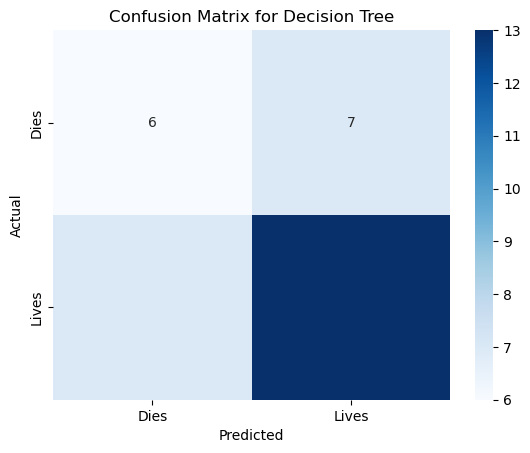

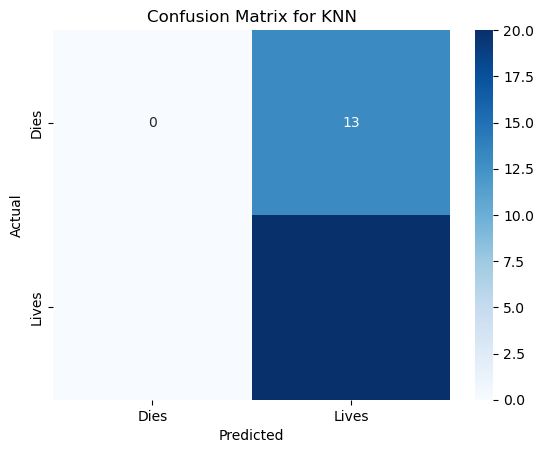

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Função para avaliação dos modelos
def evaluate_model(y_test, y_pred, model_name):
    print(f"Evaluation for {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, pos_label='Lives'))
    print("Recall:", recall_score(y_test, y_pred, pos_label='Lives'))
    print("F1 Score:", f1_score(y_test, y_pred, pos_label='Lives'))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Dies', 'Lives']))

# Função para plotar matriz de confusão
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dies', 'Lives'], yticklabels=['Dies', 'Lives'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()


# Carregar o conjunto de dados
file_path = 'hcc_dataset.csv'  # Assumindo que o arquivo está no mesmo diretório que o notebook
data = pd.read_csv('hcc_dataset.csv')

# Verificar os primeiros registros do conjunto de dados
print(data.head())


# Substituir '?' por NaN
data.replace('?', np.nan, inplace=True)

# Separar features e target
X = data.drop('Class', axis=1)
y = data['Class']

# Identificar colunas numéricas e categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Pipelines de pré-processamento
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar transformadores em um ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar pré-processamento
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Treinar e avaliar modelos

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# KNN Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Avaliar Decision Tree
evaluate_model(y_test, y_pred_dt, "Decision Tree")

# Avaliar KNN
evaluate_model(y_test, y_pred_knn, "KNN")

# Plotar matriz de confusão para Decision Tree
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")

# Plotar matriz de confusão para KNN
plot_confusion_matrix(y_test, y_pred_knn, "KNN")


## Otimização de Hiperparâmetros

Evaluation for Optimized Decision Tree
Accuracy: 0.48484848484848486
Precision: 0.6
Recall: 0.45
F1 Score: 0.5142857142857143

Confusion Matrix:
 [[ 7  6]
 [11  9]]

Classification Report:
               precision    recall  f1-score   support

        Dies       0.39      0.54      0.45        13
       Lives       0.60      0.45      0.51        20

    accuracy                           0.48        33
   macro avg       0.49      0.49      0.48        33
weighted avg       0.52      0.48      0.49        33

Evaluation for Optimized KNN
Accuracy: 0.6666666666666666
Precision: 0.6451612903225806
Recall: 1.0
F1 Score: 0.7843137254901961

Confusion Matrix:
 [[ 2 11]
 [ 0 20]]

Classification Report:
               precision    recall  f1-score   support

        Dies       1.00      0.15      0.27        13
       Lives       0.65      1.00      0.78        20

    accuracy                           0.67        33
   macro avg       0.82      0.58      0.53        33
weighted avg      

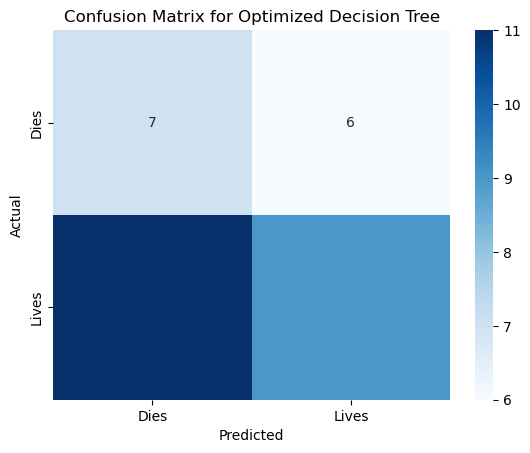

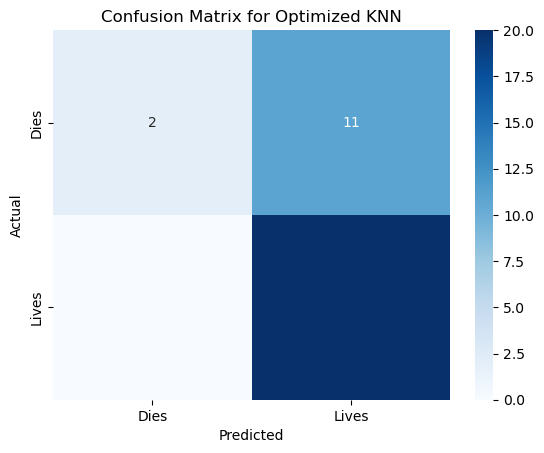

In [ ]:
# Hiperparâmetros para Decision Tree
dt_param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Hiperparâmetros para KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Grid Search para Decision Tree
dt_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)
best_dt_model = dt_grid_search.best_estimator_

# Grid Search para KNN
knn_grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)
best_knn_model = knn_grid_search.best_estimator_

# Avaliar modelos otimizados
y_pred_best_dt = best_dt_model.predict(X_test)
y_pred_best_knn = best_knn_model.predict(X_test)

# Avaliar Decision Tree otimizado
evaluate_model(y_test, y_pred_best_dt, "Optimized Decision Tree")

# Avaliar KNN otimizado
evaluate_model(y_test, y_pred_best_knn, "Optimized KNN")

# Plotar matriz de confusão para Decision Tree otimizado
plot_confusion_matrix(y_test, y_pred_best_dt, "Optimized Decision Tree")

# Plotar matriz de confusão para KNN otimizado
plot_confusion_matrix(y_test, y_pred_best_knn, "Optimized KNN")
